## Fully-Connected Neural Networks

In [2]:
import numpy as np
from sklearn.datasets import load_digits

In [3]:
X, y = load_digits(return_X_y=True)

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

---

In [9]:
# !pip install tensorflow

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(64,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [14]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
41/41 [==============================] - 1s 7ms/step - loss: 2.1418 - accuracy: 0.5112 - val_loss: 0.7694 - val_accuracy: 0.7639
Epoch 2/20
41/41 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.8476 - val_loss: 0.3310 - val_accuracy: 0.9097
Epoch 3/20
41/41 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9196 - val_loss: 0.2661 - val_accuracy: 0.9236
Epoch 4/20
41/41 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9482 - val_loss: 0.1965 - val_accuracy: 0.9375
Epoch 5/20
41/41 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9667 - val_loss: 0.2132 - val_accuracy: 0.9583
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.9791 - val_loss: 0.2010 - val_accuracy: 0.9444
Epoch 7/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9853 - val_loss: 0.2030 - val_accuracy: 0.9375
Epoch 8/20
41/41 [==

In [15]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9778


[0.08226823061704636, 0.9777777791023254]

In [16]:
test_example = X_test[53]
for i, num in enumerate(test_example):
    if(i % 8 == 0) :
        print('\n' ,end='')
    print(num, end='\t')


0.0	0.0	15.0	16.0	16.0	12.0	2.0	0.0	
0.0	2.0	16.0	15.0	12.0	12.0	3.0	0.0	
0.0	4.0	16.0	8.0	0.0	0.0	0.0	0.0	
0.0	8.0	16.0	12.0	4.0	0.0	0.0	0.0	
0.0	0.0	12.0	16.0	16.0	0.0	0.0	0.0	
0.0	0.0	0.0	3.0	16.0	8.0	0.0	0.0	
0.0	2.0	6.0	9.0	16.0	8.0	0.0	0.0	
0.0	1.0	15.0	16.0	15.0	3.0	0.0	0.0	

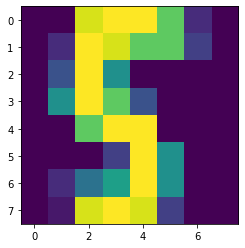

In [17]:
from matplotlib import pyplot as plt
plt.imshow(test_example.reshape(8, 8))
plt.show()

In [18]:
test_prediction = model.predict(np.array([test_example]))
test_prediction

array([[1.0030508e-11, 3.3331732e-10, 5.3355818e-12, 8.3055504e-08,
        3.0614825e-13, 9.9999988e-01, 1.2262373e-12, 6.0075176e-13,
        4.3026539e-08, 7.9361886e-09]], dtype=float32)

In [19]:
test_prediction[0].argmax()

5

---

In [20]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

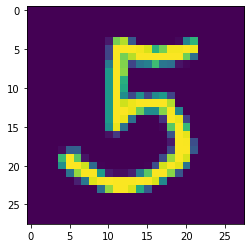

In [21]:
plt.imshow(x_train[7475])
plt.show()

### Task: Train a fully-connected neural network for MNIST dataset and try to change the model and hyperparameters to get high accuracy

In [22]:
from tensorflow.keras.layers import Dense, Flatten
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.1)

Epoch 1/30
211/211 [==============================] - 2s 7ms/step - loss: 3.1338 - accuracy: 0.7196 - val_loss: 0.6157 - val_accuracy: 0.8530
Epoch 2/30
211/211 [==============================] - 1s 6ms/step - loss: 0.4880 - accuracy: 0.8781 - val_loss: 0.2966 - val_accuracy: 0.9300
Epoch 3/30
211/211 [==============================] - 1s 6ms/step - loss: 0.3295 - accuracy: 0.9164 - val_loss: 0.2663 - val_accuracy: 0.9373
Epoch 4/30
211/211 [==============================] - 1s 6ms/step - loss: 0.2514 - accuracy: 0.9355 - val_loss: 0.2303 - val_accuracy: 0.9468
Epoch 5/30
211/211 [==============================] - 1s 6ms/step - loss: 0.2043 - accuracy: 0.9446 - val_loss: 0.2070 - val_accuracy: 0.9532
Epoch 6/30
211/211 [==============================] - 1s 6ms/step - loss: 0.1741 - accuracy: 0.9541 - val_loss: 0.1967 - val_accuracy: 0.9545
Epoch 7/30
211/211 [==============================] - 1s 6ms/step - loss: 0.1530 - accuracy: 0.9579 - val_loss: 0.1939 - val_accuracy: 0.9607
Epoch 

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.9708


[0.3161991834640503, 0.97079998254776]

---

In [73]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

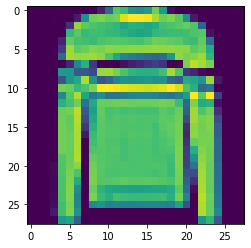

In [74]:
plt.imshow(x_train[5])

### Task: Train a fully-connected neural network for Fashion-MNIST dataset and try to change the model and hyperparameters to get high accuracy

In [75]:
from tensorflow.keras.layers import Dense, Flatten
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [76]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 100)               78500     
                                                                 
 dense_50 (Dense)            (None, 200)               20200     
                                                                 
 dense_51 (Dense)            (None, 100)               20100     
                                                                 
 dense_52 (Dense)            (None, 50)                5050      
                                                                 
 dense_53 (Dense)            (None, 10)                510       
                                                                 
Total params: 124,360
Trainable params: 124,360
Non-t

In [77]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
model.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.1)

Epoch 1/30
211/211 [==============================] - 3s 9ms/step - loss: 3.2264 - accuracy: 0.6654 - val_loss: 0.8032 - val_accuracy: 0.7265
Epoch 2/30
211/211 [==============================] - 2s 9ms/step - loss: 0.5958 - accuracy: 0.7892 - val_loss: 0.4917 - val_accuracy: 0.8307
Epoch 3/30
211/211 [==============================] - 2s 8ms/step - loss: 0.4881 - accuracy: 0.8267 - val_loss: 0.4451 - val_accuracy: 0.8408
Epoch 4/30
211/211 [==============================] - 2s 9ms/step - loss: 0.4314 - accuracy: 0.8430 - val_loss: 0.4428 - val_accuracy: 0.8445
Epoch 5/30
211/211 [==============================] - 2s 8ms/step - loss: 0.3986 - accuracy: 0.8567 - val_loss: 0.3812 - val_accuracy: 0.8642
Epoch 6/30
211/211 [==============================] - 2s 8ms/step - loss: 0.3720 - accuracy: 0.8649 - val_loss: 0.3943 - val_accuracy: 0.8595
Epoch 7/30
211/211 [==============================] - 2s 8ms/step - loss: 0.3595 - accuracy: 0.8693 - val_loss: 0.4281 - val_accuracy: 0.8677
Epoch 

In [79]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6745 - accuracy: 0.8724


[0.6745434403419495, 0.8723999857902527]